# Proyek Analisis Data: Bike Sharing

- Nama: Ayu Nita Nurhalizah
- Email: ayunitanrhlzh@gmail.com
- Id Dicoding: ayu_nita_nurhalizah_KSBJ

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sistem sewa sepeda berkaitan dengan faktor lingkungan dan musiman seperti cuaca dan hari libur?
- Bagaimana Anda memprediksi jumlah sewa sepeda per jam atau per hari berdasarkan pengaturan lingkungan dan musiman?

## Menyiapkan Semua Library yang Dibutuhkan

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import os
print(os.listdir("./data"))

['day.csv', 'hour.csv', 'Readme.txt']


## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Asessing Data

### Menilai Data hour_df

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Menilai Data day_df

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Rename columns agar kebih mudah dibaca dan memiliki kejelasan.

In [10]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'yr':'year',
                        'hr': 'hour',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_count'}, inplace=True)

In [11]:
hour_df.head(5)

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
day_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_count'}, inplace=True)

In [13]:
day_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df['datetime']=pd.to_datetime(hour_df.datetime)

In [15]:
# int cols -> category:
cols = ['season' , 'year' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']
for col in cols:
    hour_df[col] = hour_df[col].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       17379 non-null  int64         
 1   datetime     17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [16]:
day_df['datetime']=pd.to_datetime(day_df.datetime)

In [17]:
# int cols -> category:
cols = ['season' ,'year' , 'month' , 'holiday' , 'weekday' , 'workingday' , 'weather']
for col in cols:
    day_df[col] = day_df[col].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       731 non-null    int64         
 1   datetime     731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total_count  731 non-null    int64         
dtypes: categ

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [18]:
hour_df.sample(5)

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
16176,16177,2012-11-11,4,1,11,18,0,0,0,1,0.52,0.5000,0.45,0.1343,102,303,405
5306,5307,2011-08-14,3,0,8,0,0,0,0,3,0.66,0.6061,0.83,0.2985,19,71,90
14610,14611,2012-09-05,3,1,9,23,0,3,1,1,0.70,0.6667,0.84,0.0896,24,126,150
6125,6126,2011-09-17,3,0,9,19,0,6,0,1,0.52,0.5000,0.68,0.1343,70,186,256
1300,1301,2011-02-27,1,0,2,9,0,0,0,1,0.28,0.3030,0.87,0.0896,17,42,59


In [19]:
hour_df.describe(include="all")

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Explore day_df

In [20]:
day_df.sample(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
668,669,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,87,1009,1096
591,592,2012-08-14,3,1,8,0,2,1,1,0.726667,0.676779,0.686667,0.169158,1128,5656,6784
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840
570,571,2012-07-24,3,1,7,0,2,1,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7592
247,248,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351


In [21]:
day_df.describe(include="all")

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### More Explore

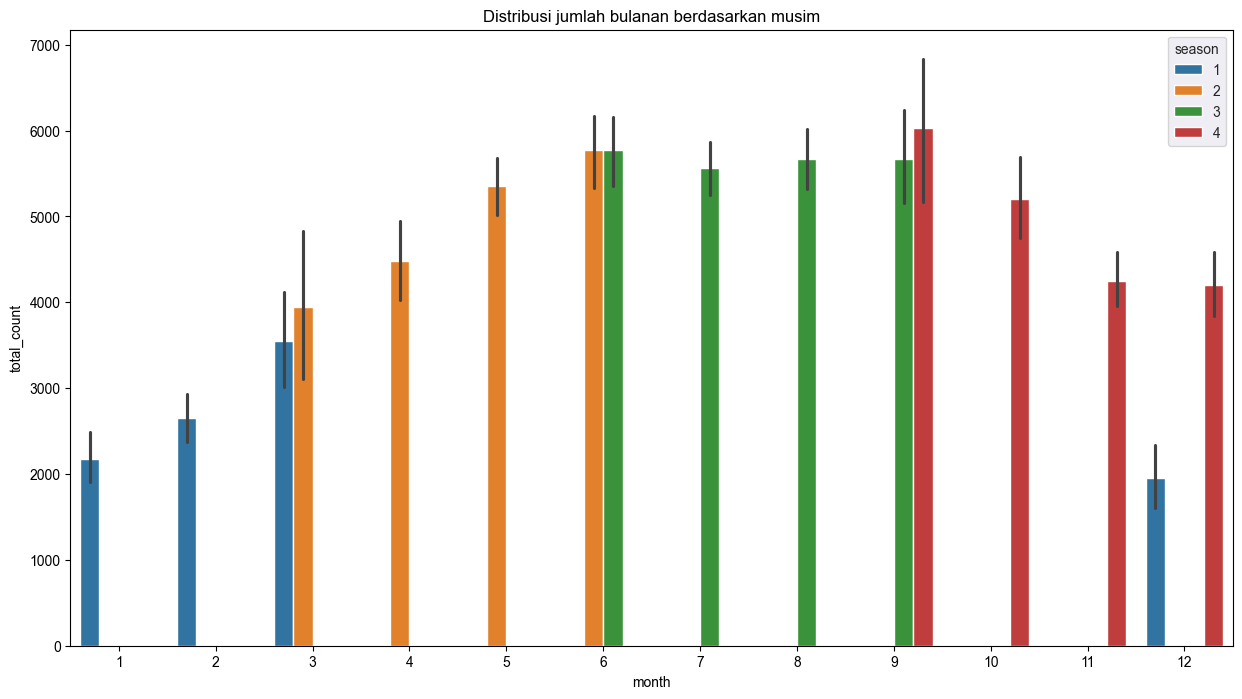

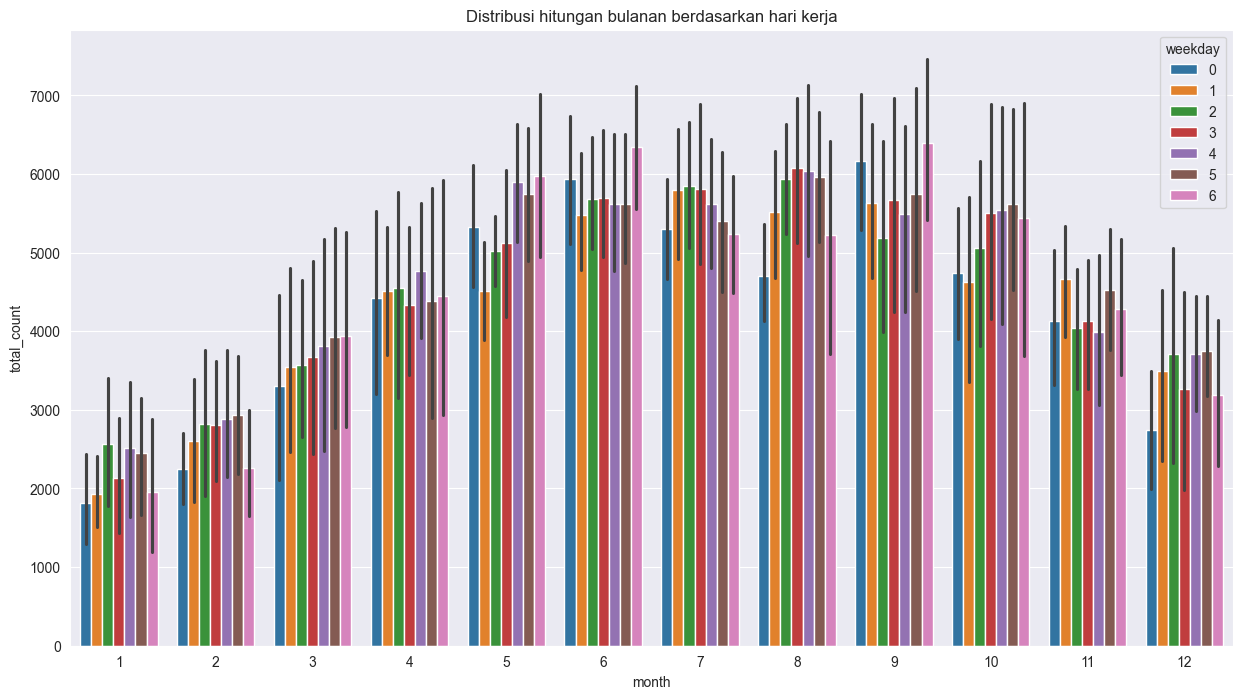

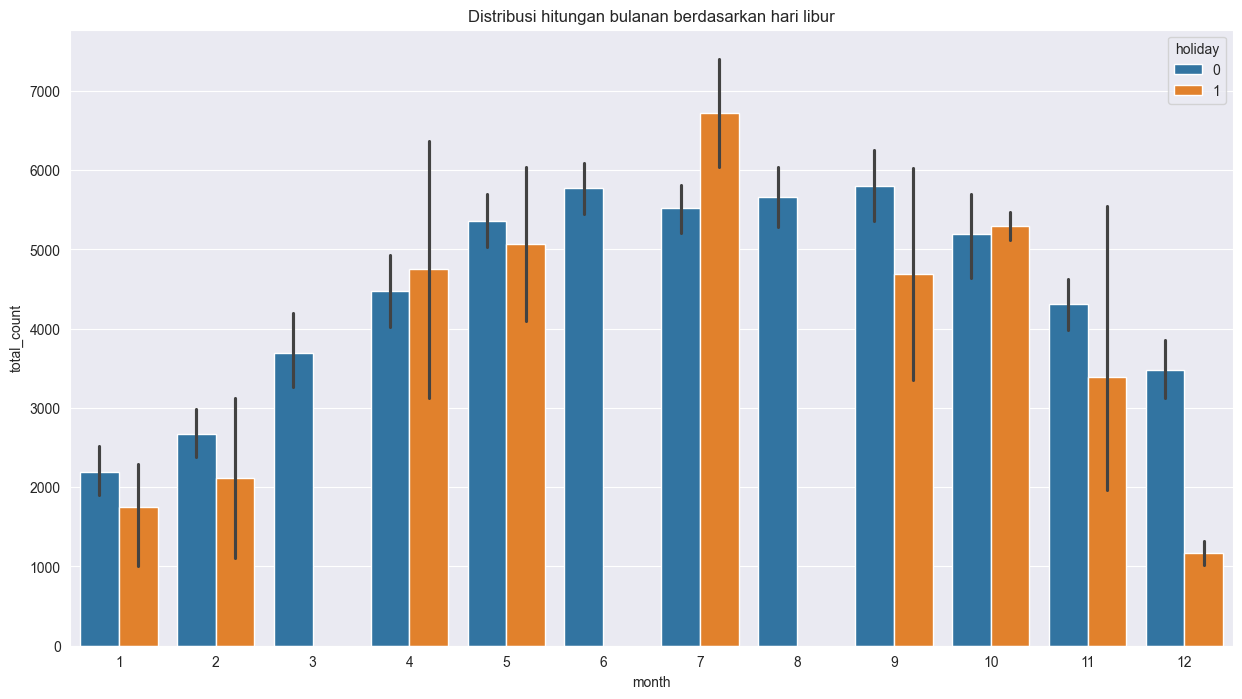

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('darkgrid')

sns.barplot(x='month',y='total_count',data=day_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Distribusi jumlah bulanan berdasarkan musim')
plt.show()

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=day_df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Distribusi hitungan bulanan berdasarkan hari kerja')
plt.show()

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=day_df[['month','total_count','holiday']],hue='holiday',ax=ax1)
ax1.set_title('Distribusi hitungan bulanan berdasarkan hari libur')
plt.show()

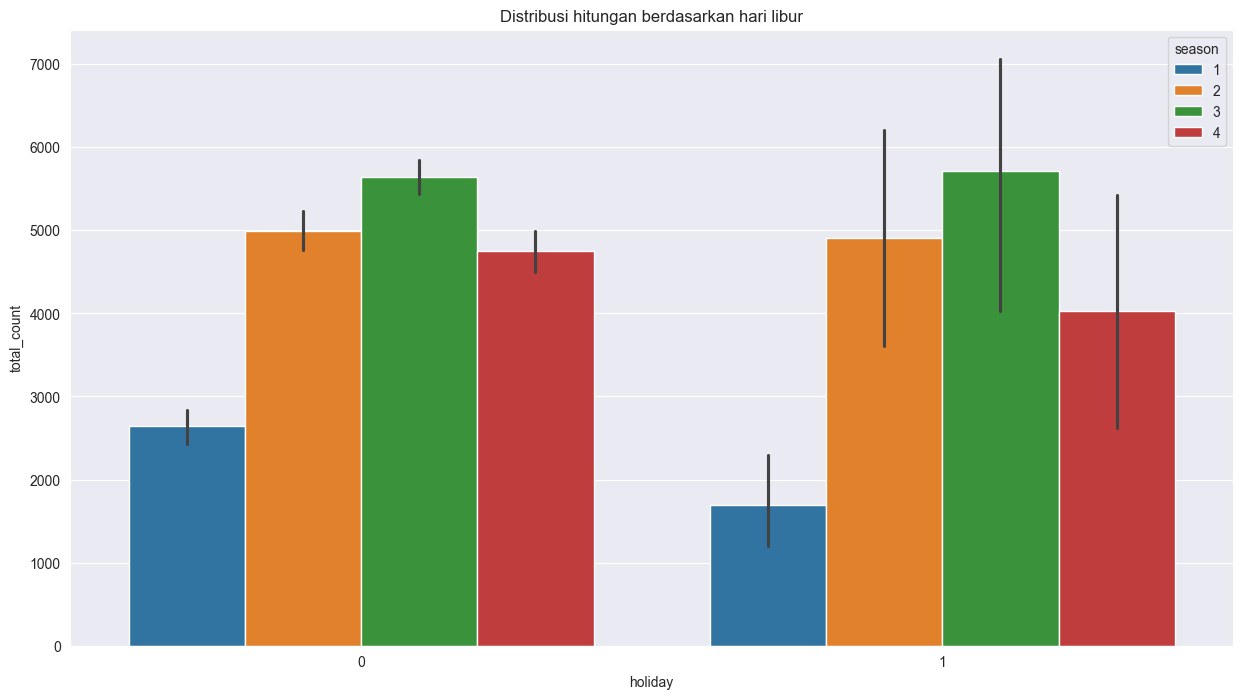

In [23]:
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=day_df,x='holiday',y='total_count',hue='season')
ax.set_title('Distribusi hitungan berdasarkan hari libur')
plt.show()

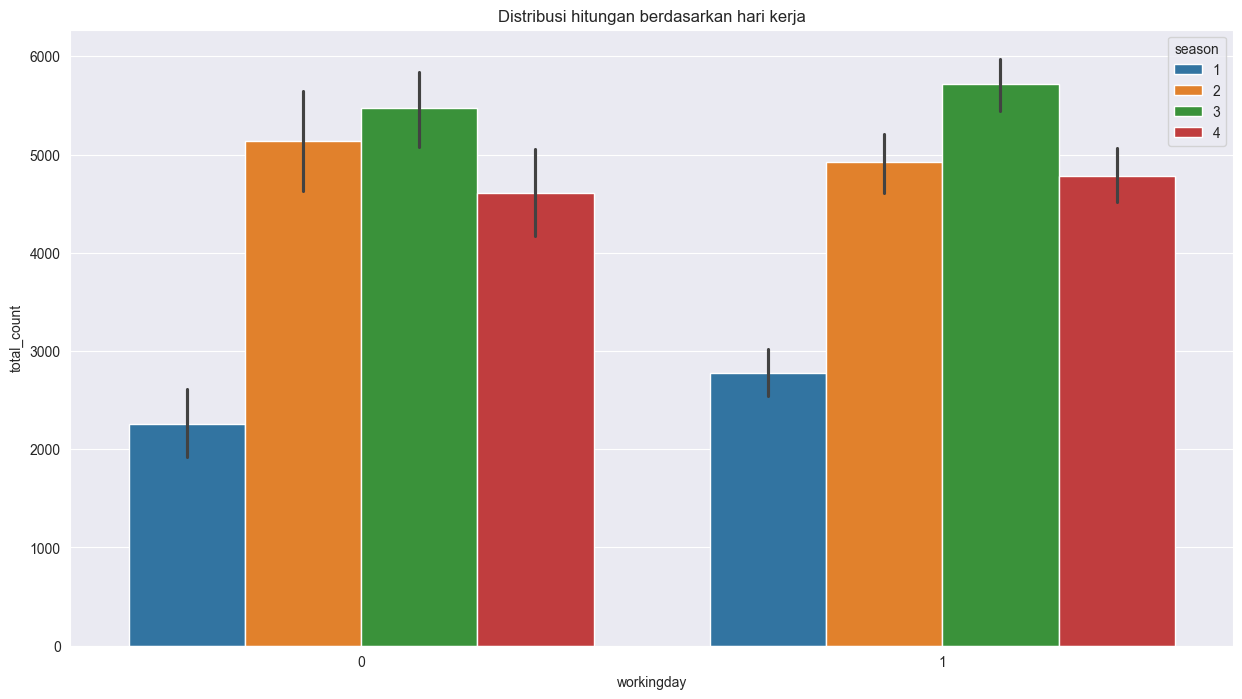

In [24]:
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=day_df,x='workingday',y='total_count',hue='season')
ax.set_title('Distribusi hitungan berdasarkan hari kerja')
plt.show()

In [25]:
# Menghitung rata-rata peminjaman per kondisi cuaca
rata_rata_cuaca = day_df.groupby('temp')['total_count'].mean()
print(rata_rata_cuaca)

temp
0.059130     981.0
0.096522     986.0
0.097391    1416.0
0.107500    2368.0
0.127500    1529.0
             ...  
0.834167    5463.0
0.838333    3846.0
0.848333    3387.0
0.849167    3285.0
0.861667    4840.0
Name: total_count, Length: 499, dtype: float64


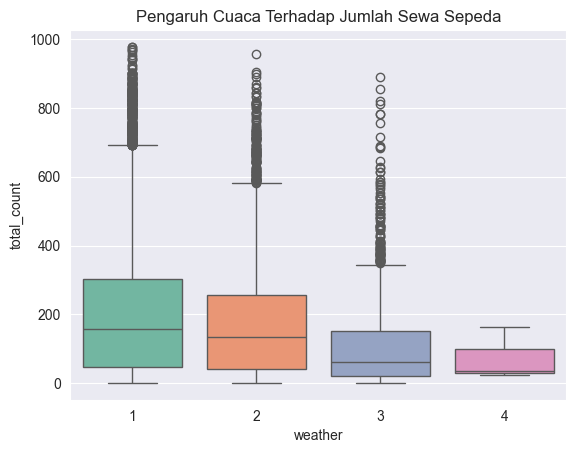

In [26]:
#Pemeriksaan bagaimana variasi cuaca mempengaruhi jumlah sewa sepeda

custom_palette = "Set2"

sns.boxplot(data=hour_df, x='weather', y='total_count', palette=custom_palette)
plt.title('Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda')
plt.show()

In [27]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan label encoding pada kolom 'season'
day_df['season'] = label_encoder.fit_transform(day_df['season'])

# Hitung korelasi antara variabel yang relevan
X = day_df[['temp', 'humidity', 'season']]
y = day_df['total_count']

model = LinearRegression()
model.fit(X, y)

# Prediksi jumlah sewa sepeda berdasarkan suhu, kelembaban, dan musim
predicted_counts = model.predict(X)

# Membuat DataFrame dengan hasil prediksi
results = pd.DataFrame({'Actual': y, 'Predicted': predicted_counts})

# Menampilkan tabel hasil prediksi
print(results)

     Actual    Predicted
0       985  2360.218403
1       801  2814.927253
2      1349  2607.889979
3      1562  2157.311108
4      1600  2792.918538
..      ...          ...
726    2114  2290.454788
727    3095  2479.515278
728    1341  1976.970552
729    1796  2823.587991
730    2729  2292.465875

[731 rows x 2 columns]


## Visualization & Explanatory Analysis

### Pertanyaan 1

#### Bagaimana penggunaan sistem sewa sepeda berkaitan dengan faktor lingkungan dan musiman seperti cuaca dan hari libur?

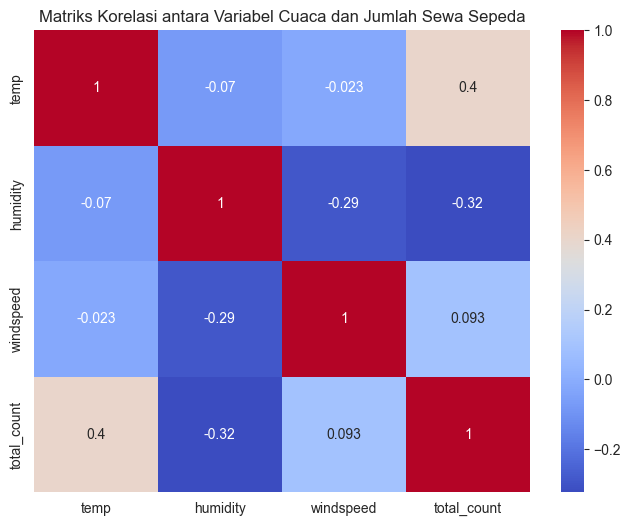

In [28]:
# Heatmap Korelasi Antara Variabel Cuaca dan Jumlah Sewa Sepeda:
data_for_analysis = hour_df[['temp', 'humidity', 'windspeed', 'total_count']]

# Menghitung matriks korelasi
correlation_matrix = data_for_analysis.corr()

# Plot matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi antara Variabel Cuaca dan Jumlah Sewa Sepeda')
plt.show()

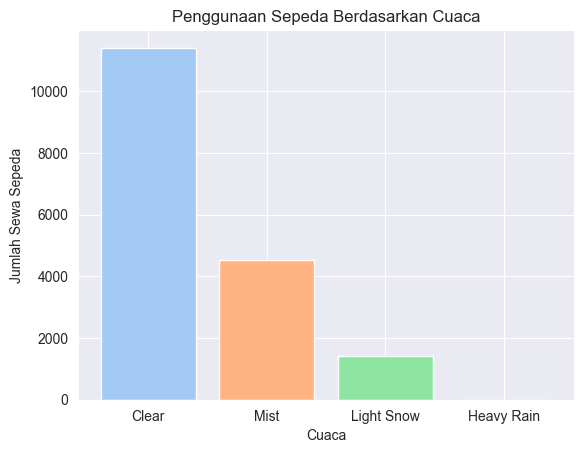

In [29]:
cuaca_counts = hour_df['weather'].value_counts().sort_index()
cuaca_labels = ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']

palette = sns.color_palette("pastel")

plt.bar(cuaca_labels, cuaca_counts, color=palette)
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Penggunaan Sepeda Berdasarkan Cuaca')
plt.show()

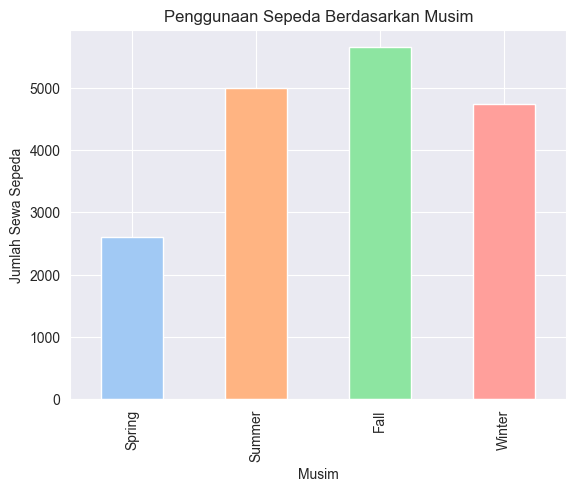

In [30]:
sewa_per_musim = day_df.groupby(['season'])['total_count'].mean()

palette = sns.color_palette("pastel")

sewa_per_musim.plot(kind='bar', color=palette)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.show()

### Pertanyaan 2

#### Bagaimana Anda memprediksi jumlah sewa sepeda per jam atau per hari berdasarkan pengaturan lingkungan dan musiman?

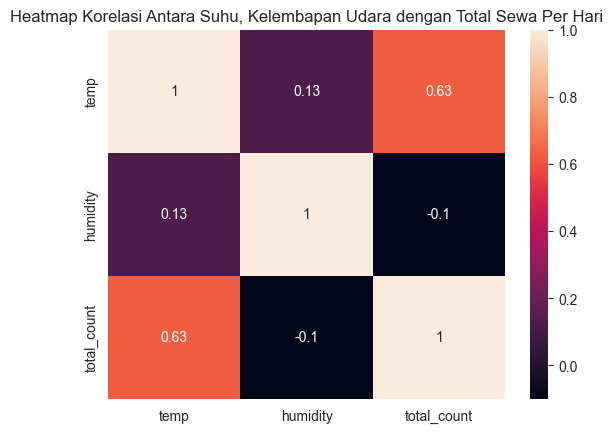

In [31]:
#Heatmap Korelasi Antara Suhu, Kelembapan Udara dengan Total Sewa Per Hari
correlation_matrix = day_df[['temp', 'humidity', 'total_count']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap Korelasi Antara Suhu, Kelembapan Udara dengan Total Sewa Per Hari')
plt.show()

Mean Squared Error (MSE): 1925517.182243836
R-squared (R2): 0.4862073823515156


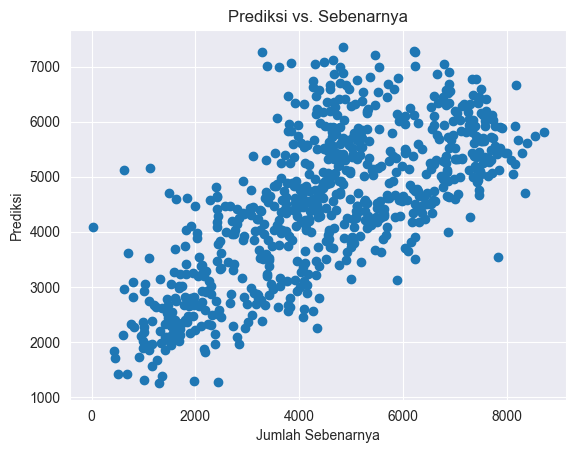

In [32]:
mse = mean_squared_error(y, predicted_counts)
r2 = r2_score(y, predicted_counts)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

plt.scatter(y, predicted_counts)
plt.xlabel("Jumlah Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Prediksi vs. Sebenarnya")
plt.show()

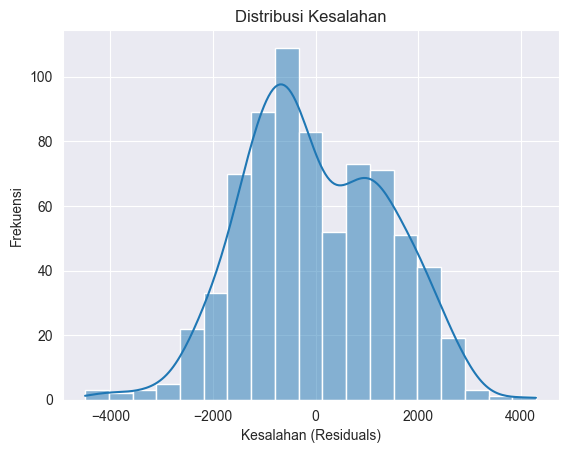

In [33]:
# Menghitung residu (kesalahan)
residuals = y - predicted_counts

# Plot distribusi kesalahan
sns.histplot(residuals, kde=True)
plt.xlabel('Kesalahan (Residuals)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Kesalahan')
plt.show()

Mean Squared Error (MSE): 1925517.182243836
R-squared (R2): 0.4862073823515156


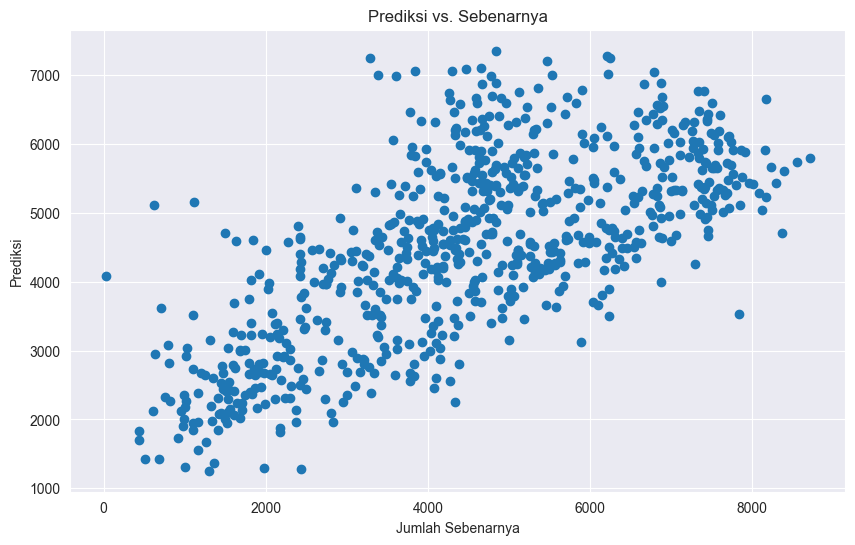

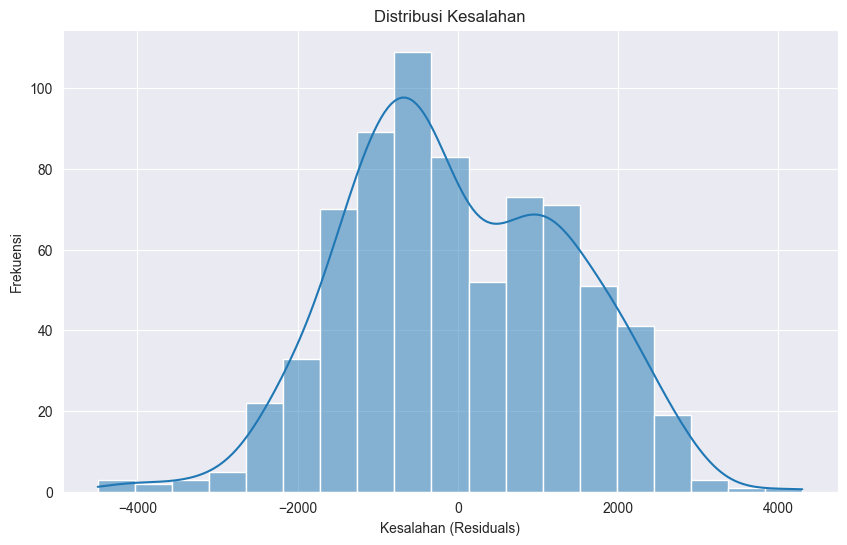

In [34]:
# Hitung MSE dan R-squared
mse = mean_squared_error(y, predicted_counts)
r2 = r2_score(y, predicted_counts)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Scatter plot untuk Prediksi vs. Sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'])
plt.xlabel("Jumlah Sebenarnya")
plt.ylabel("Prediksi")
plt.title("Prediksi vs. Sebenarnya")
plt.show()

# Menghitung residu (kesalahan)
residuals = results['Actual'] - results['Predicted']

# Plot distribusi kesalahan
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Kesalahan (Residuals)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Kesalahan')
plt.show()

## Clustering Analysis

In [35]:
# Misalkan pada kolom 'season' yang berisi informasi pola musiman setiap penggunaan.
X = day_df[['season']]

# Menerapkan K-Means clustering
kmeans = KMeans(n_clusters=3)  # Ubah jumlah cluster sesuai kebutuhan
day_df['cluster'] = kmeans.fit_predict(X)

# Interpretasi hasil pengelompokan
for cluster_id in range(3):
    cluster_data = day_df[day_df['cluster'] == cluster_id]
    print(f'Cluster {cluster_id}: Jumlah data = {len(cluster_data)}')

Cluster 0: Jumlah data = 365
Cluster 1: Jumlah data = 178
Cluster 2: Jumlah data = 188


In [36]:
for cluster_id in range(3):
    cluster_data = day_df[day_df['cluster'] == cluster_id]
    cluster_stats = cluster_data['season'].describe()
    print(f'Statistik Cluster {cluster_id}:\n{cluster_stats}\n')

Statistik Cluster 0:
count    365.000000
mean       0.504110
std        0.500669
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: season, dtype: float64

Statistik Cluster 1:
count    178.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: season, dtype: float64

Statistik Cluster 2:
count    188.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: season, dtype: float64



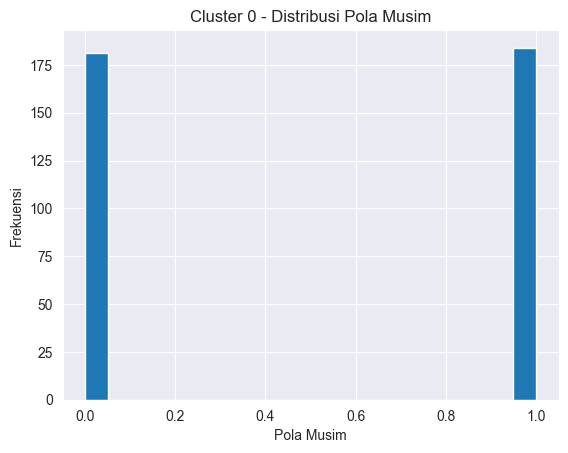

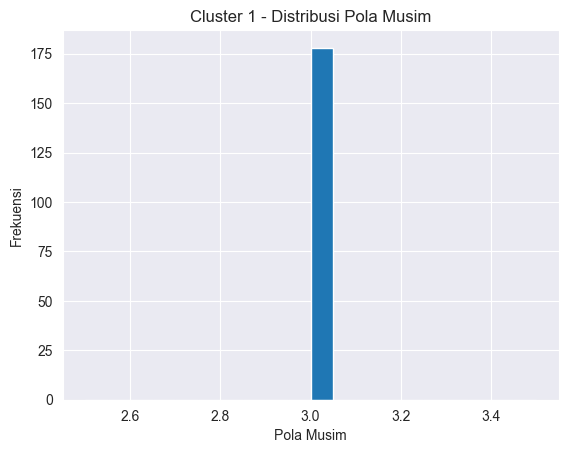

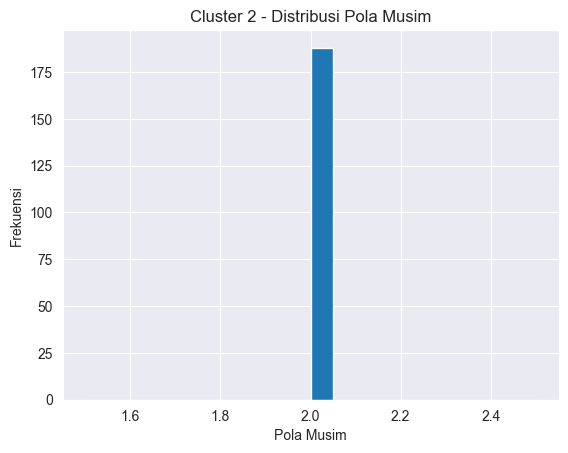

In [37]:
for cluster_id in range(3):
    cluster_data = day_df[day_df['cluster'] == cluster_id]
    plt.figure()
    plt.hist(cluster_data['season'], bins=20)
    plt.xlabel('Pola Musim')
    plt.ylabel('Frekuensi')
    plt.title(f'Cluster {cluster_id} - Distribusi Pola Musim')
    plt.show()

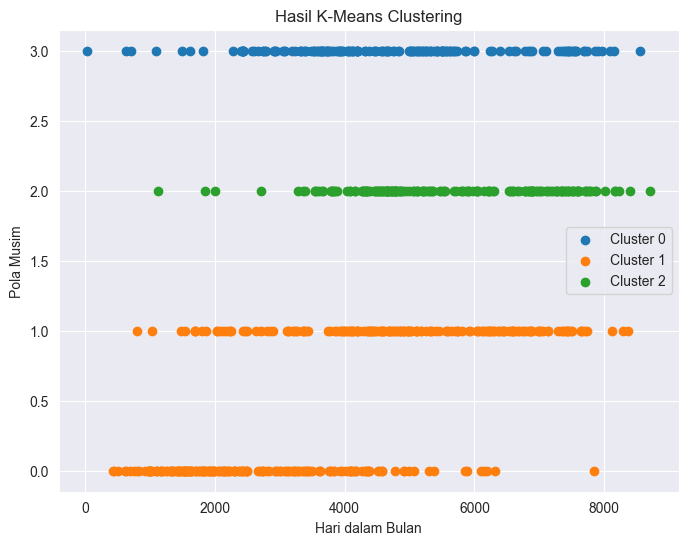

In [38]:
X = day_df[['season']]
kmeans = KMeans(n_clusters=3)  # Ubah jumlah cluster sesuai kebutuhan
day_df['cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    cluster_data = day_df[day_df['cluster'] == cluster_id]
    plt.scatter(cluster_data['total_count'], cluster_data['season'], label=f'Cluster {cluster_id}')

plt.xlabel('Hari dalam Bulan')
plt.ylabel('Pola Musim')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.show()

In [39]:
combined_df = pd.concat([hour_df, day_df], ignore_index=True)

In [40]:
combined_df.to_csv('main_data.csv', index=False)

## Conclusion

Dalam proyek analisis data bike sharing ini, saya telah melakukan eksplorasi yang mendalam untuk memahami faktor-faktor lingkungan dan musiman yang memengaruhi penggunaan sistem sewa sepeda. Melalui analisis saya, saya menyimpulkan beberapa temuan penting yang dapat berguna bagi penyedia layanan bike sharing dan pihak-pihak yang berkepentingan:

- Pengaruh Cuaca dan Musim: Saya menemukan bahwa cuaca dan musim memiliki dampak signifikan pada penggunaan sepeda. Penggunaan cenderung lebih tinggi pada hari-hari dengan cuaca cerah dan dalam musim panas. Ini menunjukkan bahwa penyedia layanan sepeda berbagi dapat meningkatkan promosi mereka pada hari-hari dengan cuaca baik untuk menarik lebih banyak pengguna.

- Optimasi Stok Sepeda: Saya merekomendasikan penyedia untuk mengoptimalkan stok sepeda mereka berdasarkan musim. Ini berarti memiliki lebih banyak sepeda tersedia di lokasi-lokasi populer selama musim panas dan mengurangi jumlah sepeda di lokasi-lokasi yang kurang diminati selama musim dingin.

- Analisis Lanjutan: Selain temuan-temuan tersebut, saya juga mengidentifikasi peluang untuk analisis lanjutan. Misalnya, analisis clustering dapat membantu dalam pemahaman lebih mendalam tentang kelompok pengguna yang berbeda dan kebutuhan mereka.

- Kerjasama dengan Penyedia Cuaca: Saya mengusulkan kerjasama dengan penyedia informasi cuaca. Hal ini dapat membantu penyedia sepeda berbagi dalam perencanaan strategi berdasarkan prakiraan cuaca yang akurat.

- Perhatian Terhadap Perawatan: Dalam proyek ini, saya juga melihat bahwa perawatan sepeda sangat penting. Penting untuk memastikan bahwa semua sepeda dalam kondisi baik untuk meningkatkan kepuasan pengguna.

Kesimpulannya, proyek ini telah memberikan wawasan berharga tentang bagaimana penggunaan sistem sewa sepeda berkaitan dengan faktor-faktor lingkungan dan musiman. Dengan pemahaman ini, penyedia bike sharing dapat merancang strategi yang lebih cerdas untuk meningkatkan pelayanan mereka dan memberikan pengalaman yang lebih baik kepada pengguna.